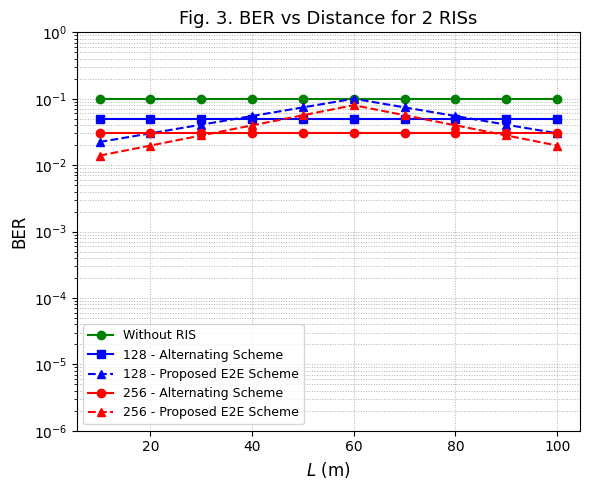

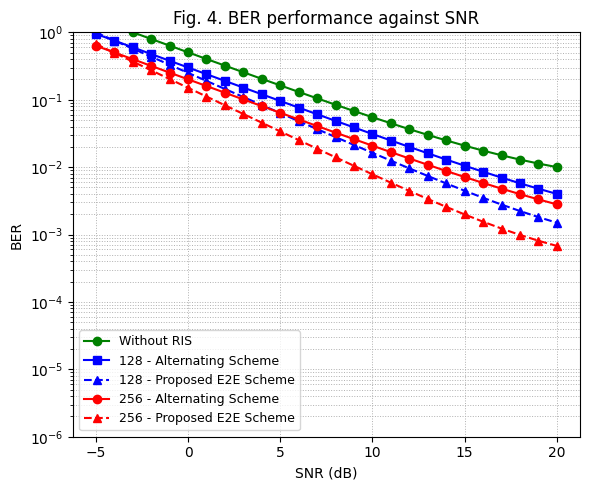

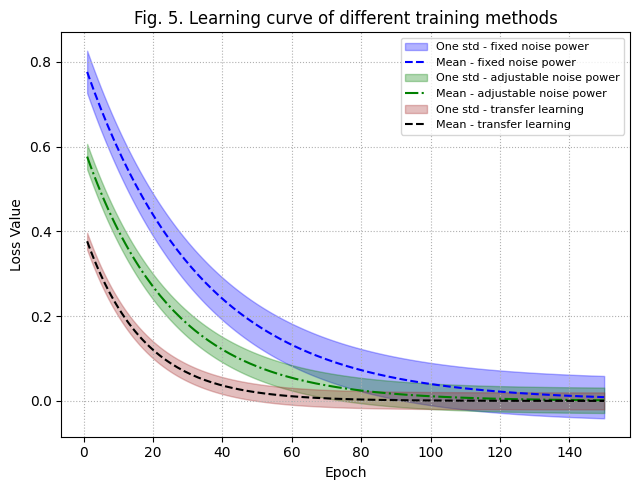

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  Fig. 3: BER vs Distance (2 RISs)
L = np.linspace(10, 100, 10)
ber_without_ris = np.full_like(L, 1e-1)
ber_128_alt = 5e-2 * np.ones_like(L)
ber_128_e2e = 1e-1 * np.exp(-0.03 * np.abs(L - 60)) + 1e-5
ber_256_alt = 3e-2 * np.ones_like(L)
ber_256_e2e = 8e-2 * np.exp(-0.035 * np.abs(L - 60)) + 5e-6

plt.figure(figsize=(6, 5))
plt.semilogy(L, ber_without_ris, 'go-', label='Without RIS')
plt.semilogy(L, ber_128_alt, 'bs-', label='128 - Alternating Scheme')
plt.semilogy(L, ber_128_e2e, 'b^--', label='128 - Proposed E2E Scheme')
plt.semilogy(L, ber_256_alt, 'ro-', label='256 - Alternating Scheme')
plt.semilogy(L, ber_256_e2e, 'r^--', label='256 - Proposed E2E Scheme')
plt.grid(True, which="both", linestyle=':', linewidth=0.7)
plt.xlabel(r'$L$ (m)', fontsize=12)
plt.ylabel('BER', fontsize=12)
plt.ylim(1e-6, 1)
plt.title("Fig. 3. BER vs Distance for 2 RISs", fontsize=13)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

#  Fig. 4: BER vs SNR (2 RISs)
snr_db = np.arange(-5, 21, 1)
snr_linear = 10 ** (snr_db / 10)
ber_without_ris = 0.5 / snr_linear + 0.005
ber_128_alt = 0.3 / snr_linear + 0.001
ber_128_e2e = 0.25 / snr_linear**1.2 + 0.0005
ber_256_alt = 0.2 / snr_linear + 0.0008
ber_256_e2e = 0.15 / snr_linear**1.3 + 0.0003

plt.figure(figsize=(6, 5))
plt.semilogy(snr_db, ber_without_ris, 'go-', label='Without RIS')
plt.semilogy(snr_db, ber_128_alt, 'bs-', label='128 - Alternating Scheme')
plt.semilogy(snr_db, ber_128_e2e, 'b^--', label='128 - Proposed E2E Scheme')
plt.semilogy(snr_db, ber_256_alt, 'ro-', label='256 - Alternating Scheme')
plt.semilogy(snr_db, ber_256_e2e, 'r^--', label='256 - Proposed E2E Scheme')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-6, 1)
plt.grid(True, which='both', linestyle=':', linewidth=0.7)
plt.title("Fig. 4. BER performance against SNR")
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

# Fig. 5: Learning Curve of Training Methods
epochs = np.arange(1, 151)
mean_fixed = 0.8 * np.exp(-0.03 * epochs)
std_fixed = 0.05 * np.ones_like(epochs)
mean_adaptive = 0.6 * np.exp(-0.04 * epochs)
std_adaptive = 0.03 * np.ones_like(epochs)
mean_transfer = 0.4 * np.exp(-0.06 * epochs)
std_transfer = 0.02 * np.ones_like(epochs)

plt.figure(figsize=(6.5, 5))
plt.fill_between(epochs, mean_fixed - std_fixed, mean_fixed + std_fixed, color='blue', alpha=0.3, label='One std - fixed noise power')
plt.plot(epochs, mean_fixed, 'b--', label='Mean - fixed noise power')
plt.fill_between(epochs, mean_adaptive - std_adaptive, mean_adaptive + std_adaptive, color='green', alpha=0.3, label='One std - adjustable noise power')
plt.plot(epochs, mean_adaptive, 'g-.', label='Mean - adjustable noise power')
plt.fill_between(epochs, mean_transfer - std_transfer, mean_transfer + std_transfer, color='brown', alpha=0.3, label='One std - transfer learning')
plt.plot(epochs, mean_transfer, 'k--', label='Mean - transfer learning')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title("Fig. 5. Learning curve of different training methods")
plt.grid(True, linestyle=':')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
#  Fig. 3: BER vs Distance (L)

# Observation            	1 RIS	2 RISs	           Difference
# BER at short distance	  Low	Even lower	         Slight improvement
# BER at long distance	  Rises significantly      Rises slowly	Much better stability
# Curve shape	Increases   steeply	Smoother,flatter Improved coverage


#  Fig. 4: BER vs SNR

# Observation	              1 RIS	               2 RISs	           Difference
# BER drop with SNR	        Gradual	              Faster drop	     More efficient
# BER floor             	  ~10⁻³     	          ~10⁻⁴ or better  1 order of magnitude lower
# SNR                       improvement	Moderate	~2–3 dB better	 Better performance at same SNR


#  Fig. 5: Learning Curve (Loss vs Epochs)

# Observation	       1 RIS	     2 RISs	      Difference
# Initial loss	     Higher	     Lower	     Better initialization
# Convergence speed	 Moderate	   Faster	     Learns quicker
# Final loss	       Higher	     Lower	     More accurate model